# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## S03 T01: Visualització gràfica d'un dataset
### Luis Ortas

***
## Exercici 1

**Resumeix gràficament el data set DelayedFlights.csv**

**Crea almenys una visualització per:**

+ Una variable categòrica (UniqueCarrier)
+ Una variable numèrica (ArrDelay)
+ Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
+ Dues variables numèriques (ArrDelay i DepDelay)
+ Tres variables (ArrDelay, DepDelay i UniqueCarrier)
+ Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).

In [1]:
import numpy; print(f'Numpy version {numpy.__version__}')
import pandas; print(f'Pandas version {pandas.__version__}')
import matplotlib; print(f'Matplotlib version {matplotlib.__version__}')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("D:/data/DelayedFlights.csv")
pd.set_option('display.max_columns', 30)

Numpy version 1.20.1
Pandas version 1.2.4
Matplotlib version 3.3.4


**Configuramos DataFrame**

In [2]:
columnas=['Month','DayofMonth','DayOfWeek','UniqueCarrier','FlightNum','AirTime','ArrDelay',\
                          'DepDelay','Origin','Dest','Distance','ActualElapsedTime','Cancelled','Diverted']
df_vuelo= df[columnas].copy()

# definimos el retraso como mayor a 30 minutos. También los Desviados y cancelados aparecen como retraso.
def retraso_bin(x):
    
    '''Se define como retraso encima de 30 min más 
    los vuelos desviados y candelados
    0 no retraso
    1 si retraos'''
    
    if x>=30.0:
        retraso=1
    
    elif x<30:
        retraso=0
    else:
        retraso=1
        
  
    return retraso

# creamos la columa de retraso. 
df_vuelo["Retraso"]=df['ArrDelay'].apply(retraso_bin)

df_vuelo['Velocidad']=df_vuelo['Distance']/(df_vuelo['AirTime']/60)
df_vuelo['Velocidad'].round(2)
df_vuelo.replace([np.inf, -np.inf], np.nan, inplace=True)
df_vuelo

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,ActualElapsedTime,Cancelled,Diverted,Retraso,Velocidad
0,1,3,4,WN,335,116.0,-14.0,8.0,IAD,TPA,810,128.0,0,0,0,418.965517
1,1,3,4,WN,3231,113.0,2.0,19.0,IAD,TPA,810,128.0,0,0,0,430.088496
2,1,3,4,WN,448,76.0,14.0,8.0,IND,BWI,515,96.0,0,0,0,406.578947
3,1,3,4,WN,3920,77.0,34.0,34.0,IND,BWI,515,90.0,0,0,1,401.298701
4,1,3,4,WN,378,87.0,11.0,25.0,IND,JAX,688,101.0,0,0,0,474.482759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,12,13,6,DL,1621,120.0,25.0,30.0,MSP,ATL,906,147.0,0,0,0,453.000000
1936754,12,13,6,DL,1631,78.0,75.0,57.0,RIC,ATL,481,127.0,0,0,1,370.000000
1936755,12,13,6,DL,1631,122.0,99.0,80.0,ATL,IAH,689,162.0,0,0,1,338.852459
1936756,12,13,6,DL,1639,89.0,9.0,11.0,IAD,ATL,533,115.0,0,0,0,359.325843


### Porcenjae de los vuelos totales por compañia:

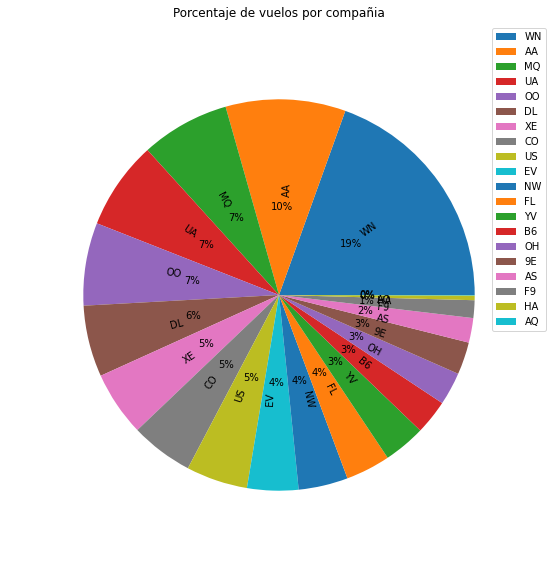

In [3]:
# Pie de compañias.

data=df_vuelo['UniqueCarrier'].value_counts(sort=True)
plt.figure(figsize =(17, 10))
plt.pie(x=data, labels=data.index, autopct='%1.0f%%', startangle=0, 
        pctdistance=.45, labeldistance=.5, rotatelabels=True, radius=0.9, normalize=True)
plt.legend(loc='best')
titulo="Porcentaje de vuelos por compañia"
plt.title(titulo)
plt.savefig(titulo)

plt.show()

*EL pastel con muchos items resulta inteligible.*

**Utilizaremos Barras:**


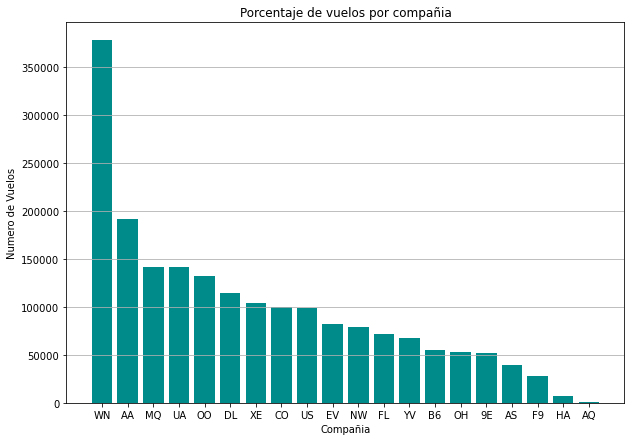

In [5]:
cia_vuelos=df_vuelo['UniqueCarrier'].value_counts()

fig = plt.figure(figsize = (10, 7))
plt.bar(cia_vuelos.index,cia_vuelos, color = '#008B8B')
plt.ylabel('Numero de Vuelos')
plt.xlabel('Compañia')

Titulo='Vuelos por Compañia'
plt.title('titulo')
plt.grid(axis='y')

plt.title(titulo)
plt.savefig(titulo)

plt.show()


### Vuelos retrasados vuelos totales y porcentaje de retraso por día de la semana.

In [7]:
vuelos_Retrasados=df_vuelo[df_vuelo['Retraso']==1]
cuenta_Retraso=vuelos_Retrasados.groupby('DayOfWeek')['DayOfWeek'].agg(len)

cuenta_Vuelo=df_vuelo.groupby('DayOfWeek')['DayOfWeek'].agg(len)

#porc_Retrasos=df_vuelo[df_vuelo['Retraso']==1]['DayOfWeek'].value_counts(normalize=True)


retrasos=pd.DataFrame({'N_Vuelos_Retrasado':cuenta_Retraso,'N_Vuelos':cuenta_Vuelo})
retrasos['Porcentaje']=(retrasos['N_Vuelos_Retrasado']/retrasos['N_Vuelos']).round(2)

retrasos

,N_Vuelos_Retrasado,N_Vuelos,Porcentaje
DayOfWeek,,,
1,128432,290933,0.44
2,118751,260943,0.46
3,114320,262805,0.43
4,126498,289451,0.44
5,149289,323259,0.46
6,92664,223256,0.42
7,129458,286111,0.45


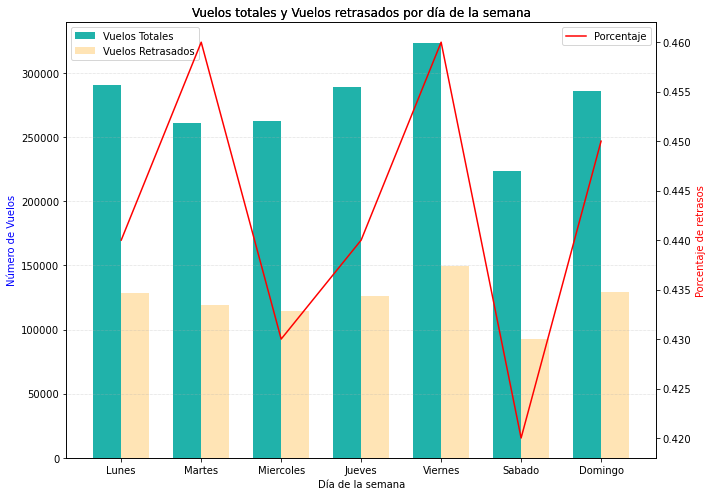

In [8]:
# Tres variables N Vuelos Retrasasdo Nº Vuelos Semanna
retrasos.index=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
labels = retrasos.index
num_Vuelos = retrasos.N_Vuelos
num_Retrasados = retrasos.N_Vuelos_Retrasado
porcentaje=retrasos.Porcentaje



x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

fig.set_size_inches(10, 7)#### redefinimos el tamaño. Hay que hacerlo por que se ha definido antes.

ax1.bar(x - width/2, num_Vuelos, width, label='Vuelos Totales',color='#20B2AA')
ax1.bar(x + width/2, num_Retrasados, width, label='Vuelos Retrasados',color='#FFE4B5')

plt.grid(axis='y', linestyle='dotted', linewidth=0.5)# definimos la linea

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Número de Vuelos',color='blue')
ax1.set_xlabel('Día de la semana')

titulo='Vuelos totales y Vuelos retrasados por día de la semana'

ax1.set_title(titulo)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc="upper left")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color='red'
ax2.plot(x,porcentaje,label='Porcentaje',color='red')

#plt.ylim([0, 1]) ## definimos los limites de 0 a 1
ax2.set_ylabel('Porcentaje de retrasos',color='red')

ax2.set_xticks(x)


ax2.legend()


fig.tight_layout()

plt.title(titulo)
plt.savefig(titulo)

plt.show()


### Vuelos retrasados vuelos totales y porcentaje de retraso por mes.

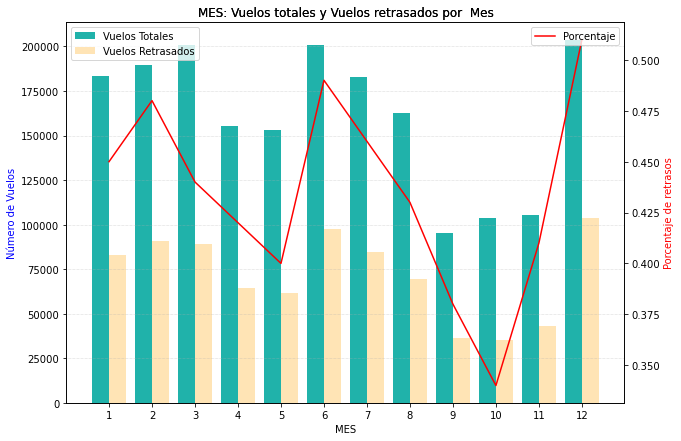

In [9]:
# N Vuelos N retrasos Porcentaje. MES
vuelos_Retrasados=df_vuelo[df_vuelo['Retraso']==1]
cuenta_Retraso=vuelos_Retrasados.groupby('Month')['Month'].agg(len)

cuenta_Vuelo=df_vuelo.groupby('Month')['Month'].agg(len)

#porc_Retrasos=df_vuelo[df_vuelo['Retraso']==1]['DayOfWeek'].value_counts(normalize=True)


retrasos=pd.DataFrame({'N_Vuelos_Retrasado':cuenta_Retraso,'N_Vuelos':cuenta_Vuelo})
retrasos['Porcentaje']=(retrasos['N_Vuelos_Retrasado']/retrasos['N_Vuelos']).round(2)

# Tres variables N Vuelos Retrasasdo Nº Vuelos MES

labels = retrasos.index
num_Vuelos = retrasos.N_Vuelos
num_Retrasados = retrasos.N_Vuelos_Retrasado
porcentaje=retrasos.Porcentaje



x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax1 = plt.subplots()

fig.set_size_inches(10, 7)#### redefinimos el tamaño. Hay que hacerlo por que se ha definido antes.

ax1.bar(x - width/2, num_Vuelos, width, label='Vuelos Totales',color='#20B2AA')
ax1.bar(x + width/2, num_Retrasados, width, label='Vuelos Retrasados',color='#FFE4B5')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Número de Vuelos',color='blue')
ax1.set_xlabel('MES')
titulo='MES: Vuelos totales y Vuelos retrasados por  Mes'
ax1.set_title(titulo)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc="upper left")
plt.grid(axis='y', linestyle='dotted', linewidth=0.5)# definimos la linea
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color='red'
ax2.plot(x,porcentaje,label='Porcentaje',color='red')

#plt.ylim([0, 1]) ## definimos los limites de 0 a 1
ax2.set_ylabel('Porcentaje de retrasos',color='red')

ax2.set_xticks(x)


ax2.legend(loc='upper right')


plt.title(titulo)
plt.savefig(titulo)

plt.show()

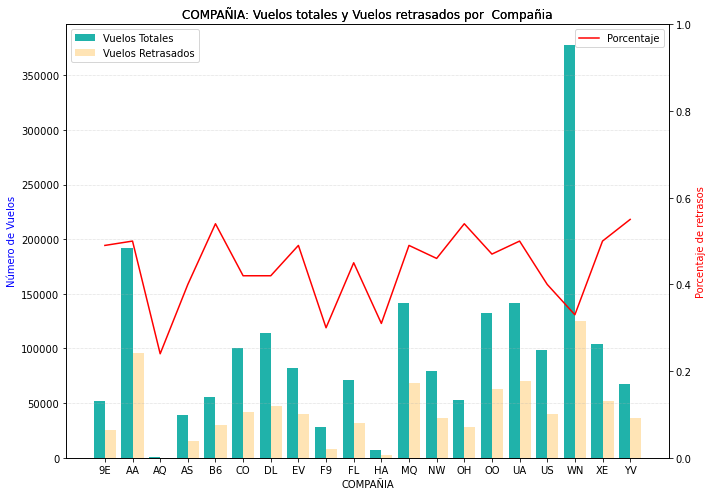

In [10]:
# N Vuelos N retrasos Porcentaje. MES


vuelos_Retrasados=df_vuelo[df_vuelo['Retraso']==1]
cuenta_Retraso=vuelos_Retrasados.groupby('UniqueCarrier')['UniqueCarrier'].agg(len)

cuenta_Vuelo=df_vuelo.groupby('UniqueCarrier')['UniqueCarrier'].agg(len)

#porc_Retrasos=df_vuelo[df_vuelo['Retraso']==1]['DayOfWeek'].value_counts(normalize=True)


retrasos=pd.DataFrame({'N_Vuelos_Retrasado':cuenta_Retraso,'N_Vuelos':cuenta_Vuelo})
retrasos['Porcentaje']=(retrasos['N_Vuelos_Retrasado']/retrasos['N_Vuelos']).round(2)

# Tres variables N Vuelos Retrasasdo Nº Vuelos MES

labels = retrasos.index
num_Vuelos = retrasos.N_Vuelos
num_Retrasados = retrasos.N_Vuelos_Retrasado
porcentaje=retrasos.Porcentaje



x = np.arange(len(labels))  # the label locations
width = 0.40  # the width of the bars

fig, ax1 = plt.subplots()

fig.set_size_inches(10, 7)#### redefinimos el tamaño. Hay que hacerlo por que se ha definido antes.

ax1.bar(x - width/2, num_Vuelos, width, label='Vuelos Totales',color='#20B2AA')
ax1.bar(x + width/2, num_Retrasados, width, label='Vuelos Retrasados',color='#FFE4B5')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Número de Vuelos',color='blue')
ax1.set_xlabel('COMPAÑIA')
titulo='COMPAÑIA: Vuelos totales y Vuelos retrasados por  Compañia'
ax1.set_title(titulo)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend(loc="upper left")
plt.grid(axis='y', linestyle='dotted', linewidth=0.5)# definimos la linea
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


color='red'
ax2.plot(x,porcentaje,label='Porcentaje',color='red')

plt.ylim([0, 1]) ## definimos los limites de 0 a 1 PARA QUE QUEPA

ax2.set_ylabel('Porcentaje de retrasos',color='red')

ax2.set_xticks(x)


ax2.legend(loc='upper right')


fig.tight_layout()

plt.title(titulo)
plt.savefig(titulo)

plt.show()

### Relación retraso en la salida con retraso en la llegada
**Scatter Plot**

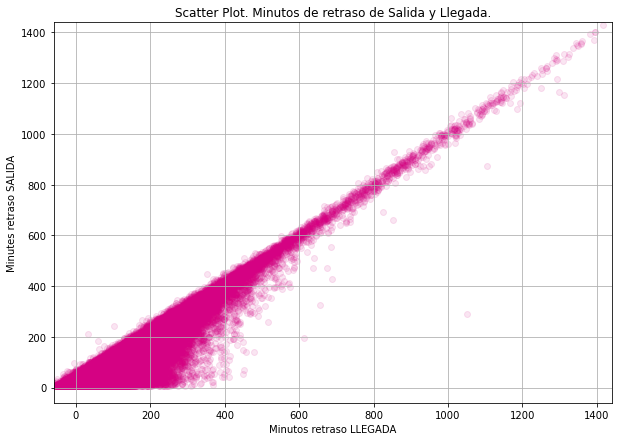

In [11]:

x = df_vuelo.ArrDelay
y = df_vuelo.DepDelay

fig = plt.figure(figsize=(10,7))
plt.scatter(x, y, color = '#d50283',alpha=0.10)
#Limits of plot range from one hour early to 24 hours delayed
plt.xlim(-60, 1440)
plt.ylim(-60, 1440)
plt.xlabel('Minutos retraso LLEGADA')
plt.ylabel('Minutes retraso SALIDA')
titulo='Scatter Plot. Minutos de retraso de Salida y Llegada.'
plt.title(titulo)
plt.grid()


plt.savefig(titulo)

plt.show()

### Relación retraso de llegada con la distancia
**Scatter Plot**

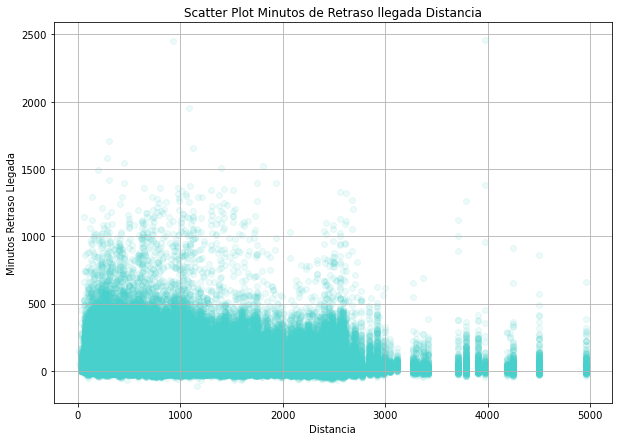

In [14]:
x = df_vuelo.Distance
y = df_vuelo.ArrDelay

fig = plt.figure(figsize=(10,7))
plt.scatter(x, y, color = '#48D1CC',alpha=0.10)


plt.xlabel('Distancia')
plt.ylabel('Minutos Retraso Llegada')
titulo='Scatter Plot Minutos de Retraso llegada Distancia'
plt.title(titulo)
plt.grid()

plt.savefig(titulo)

plt.show()

### Analisis distancia por Ruta

In [15]:
columnas2=['Origin','Dest','Distance']
df_ruta= df[columnas2].copy()
distancia=df_ruta.groupby(['Origin','Dest'])['Distance'].agg('mean').reset_index()
distancia.sort_values(by='Distance',ascending=False)


,Origin,Dest,Distance
2043,HNL,EWR,4962
1737,EWR,HNL,4962
2040,HNL,ATL,4502
208,ATL,HNL,4502
3744,ORD,HNL,4243
...,...,...,...
2100,HPN,JFK,30
2474,JFK,HPN,30
2244,IAH,HOU,24
2144,IAD,DCA,24


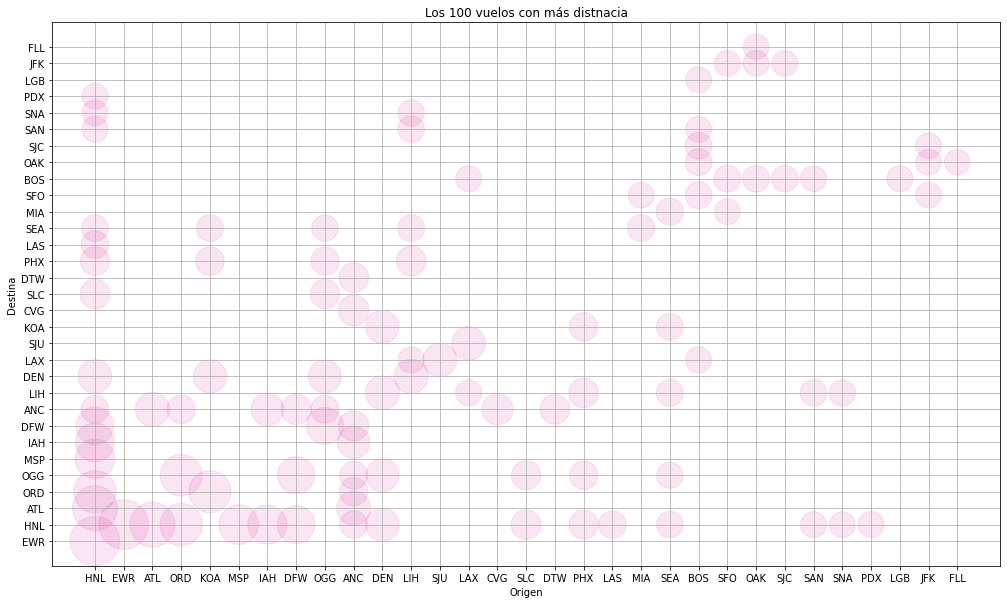

In [16]:
distancia=distancia.sort_values(by='Distance',ascending=False) ## Ordenamos por distancia
distancia_100=distancia.iloc[:100].copy()
x = distancia_100.Origin
y = distancia_100.Dest
sizes=distancia_100.Distance
cuadrado=sizes.apply(lambda x: (x/100)**2)

fig = plt.figure(figsize=(17,10))
plt.scatter(x, y, s=cuadrado,color = '#d50283',alpha=0.1)

#Limits of plot range from one hour early to 24 hours delayed

plt.xlabel('Origen')
plt.ylabel('Destina')
titulo='Los 100 vuelos con más distnacia'
plt.title(titulo)
plt.grid()

plt.savefig(titulo)

plt.show()

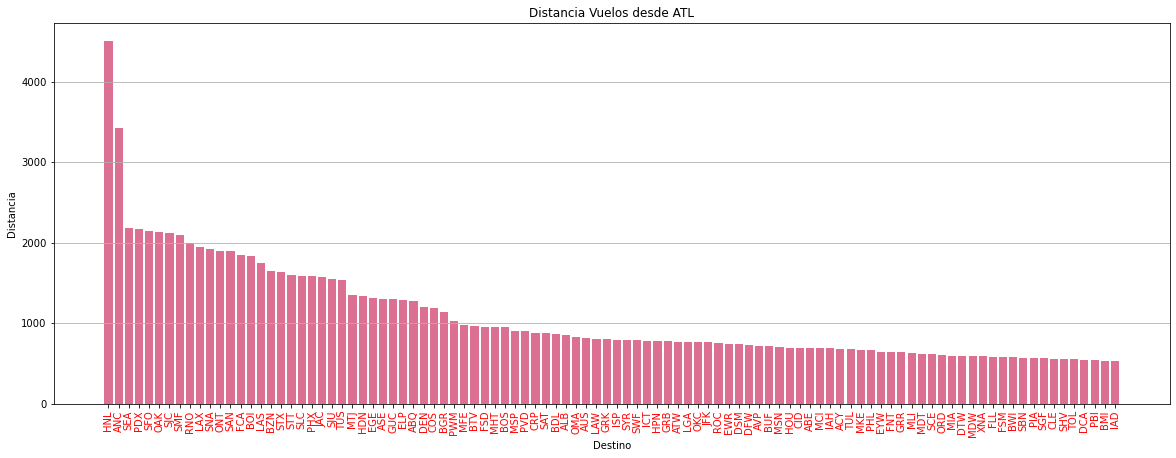

In [18]:

distancia_ATL=distancia[distancia['Origin']=='ATL'].iloc[:100]
x=distancia_ATL.Dest
y=distancia_ATL.Distance

fig = plt.figure(figsize = (20, 7))
plt.bar(x,y, color = '#DB7093')
plt.xticks(rotation=90,color='red') # rotamos 90
plt.ylabel('Distancia')
plt.xlabel('Destino')
titulo='Distancia Vuelos desde ATL'
plt.title(titulo)
plt.grid(axis='y')

plt.savefig(titulo)

plt.show()